# 📊 Business Intelligence Dashboard
**Automated insights for data-driven decisions**

In [1]:
input_file = 'data/comercializadora/comercializadora_transactions.csv'  # Input CSV file

config = {
    'project_name': 'comercializadora',       # Project name
    'out_dir' : 'outputs',               # Output directory
    
    # Data mapping
    'date_col': 'fecha',                # Required
    'product_col': 'producto',          # Required
    'description_col': 'glosa',         # Optional, set to None if not available
    'revenue_col': 'total',             # Required
    'quantity_col': 'cantidad',         # Required
    'transaction_col': 'trans_id',      # Required
    'cost_col': 'costo',                # Optional, set to None if not available 
    'customer_col': 'customer_id',      # Optional, set to None if not available
    
    # Analysis settings
    'analysis_date': '2025-03-01',      # Or 'current' for today
    'top_products_threshold': 0.2,      # Top products threshold (e.g., 0.2 for top 20%)
    'dead_stock_days': 30,              # Days of inactivity to consider stock as dead
    'currency_format': 'CLP',           # 'USD', 'EUR', 'CLP', etc.
    'language': 'ESP',                  # 'ENG' or 'ESP'
}

save = 1  # True or 1 to save outputs, False or 0 to just print

In [2]:
from modules.business_analytics import BusinessAnalyzer
from modules.dashboard import ExecutiveDashboard
from modules.advanced_analytics import AdvancedAnalytics
from modules.reports import *
from modules.utils import *

# Initialize with AdvancedAnalytics (includes all functionality)
# AdvancedAnalytics -> BusinessAnalyzer -> Business (inheritance chain)
analyzer = BusinessAnalyzer(data_source=input_file, config=config)

# Create dashboard and advanced analytics instances
dashboard = ExecutiveDashboard(analyzer)
advanced = AdvancedAnalytics(analyzer)

Data date range: 2024-12-01 to 2025-02-28
Recommended analysis_date: 2025-03-01 or later
Business initialized with data from: data/comercializadora/comercializadora_transactions.csv (49372, 15)
Output directory: outputs\comercializadora\20251002_1237
✓ All base metrics calculated
BusinessAnalyzer initialized for project: comercializadora
Dashboard initialized for project: comercializadora
AdvancedAnalytics initialized for project: comercializadora


In [3]:
# Helper function for translated filenames
from modules.translations import get_filename

def fn(prefix, suffix_key, ext='txt'):
    """Shorthand for generating translated filenames"""
    return get_filename(prefix, suffix_key, config['language'], ext)

## 🎯 Quick Summary

In [4]:
summary = dashboard.create_quick_summary()
print_info(summary, analyzer.out_dir, fn('DASH', 'quick_summary'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/DASH_resumen_rapido.txt


## 📊 KPIs

In [5]:
kpis = analyzer.get_kpis()
print_info(analyzer.print_kpis(), analyzer.out_dir, fn('BA', 'kpi'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/BA_kpi.txt


## 🚨 Alerts & Actions

In [6]:
alerts = analyzer.get_alerts()
print_info(analyzer.print_alerts(), analyzer.out_dir, fn('BA', 'alerts'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/BA_alertas.txt


## 💰 Revenue Concentration Analysis

In [7]:
pareto = analyzer.get_pareto_insights()
print_info(analyzer.print_pareto(), analyzer.out_dir, fn('BA', 'pareto'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/BA_pareto.txt


## 📦 Inventory Health Check

In [8]:
inventory = analyzer.get_inventory_health()
print_info(analyzer.print_inventory_health(), analyzer.out_dir, fn('BA', 'inventory'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/BA_inventario.txt


## ⏰ Operational Efficiency

In [9]:
peak_times = analyzer.get_peak_times()
print_info(analyzer.print_peak_times(), analyzer.out_dir, fn('BA', 'peak_times'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/BA_horas_pico.txt


# Visuals

## 📊 Executive Dashboard

✅ Dashboard saved to 'outputs\comercializadora\20251002_1237/DASH_ejecutivo.png'


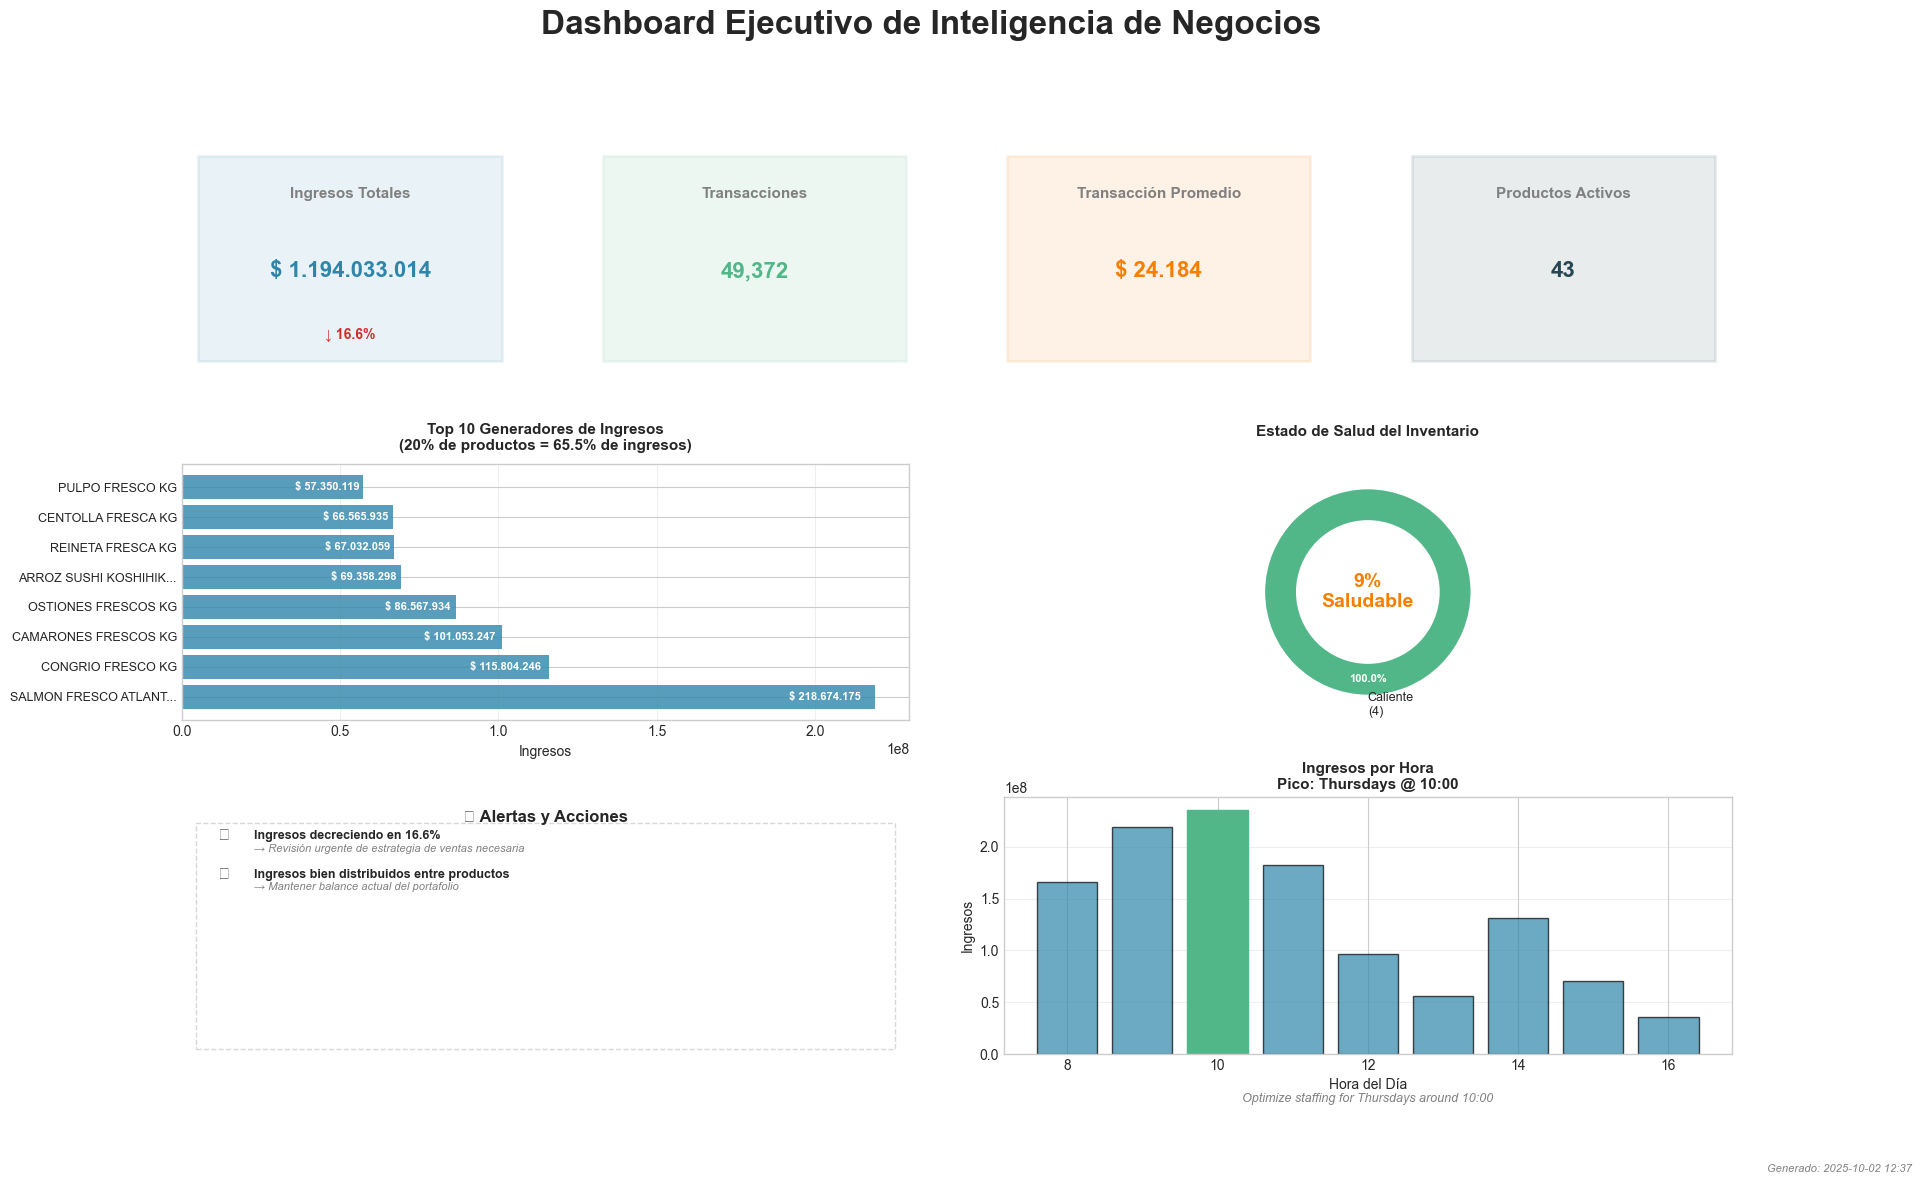

In [10]:
# Create and display the executive dashboard
fig = dashboard.create_full_dashboard(figsize=(20, 12))
print_fig(fig, dashboard.analyzer.out_dir, fn('DASH', 'executive', 'png'), save=save)

## 📈 Trend analysis

✅ Dashboard saved to 'outputs\comercializadora\20251002_1237/DASH_tendencia.png'


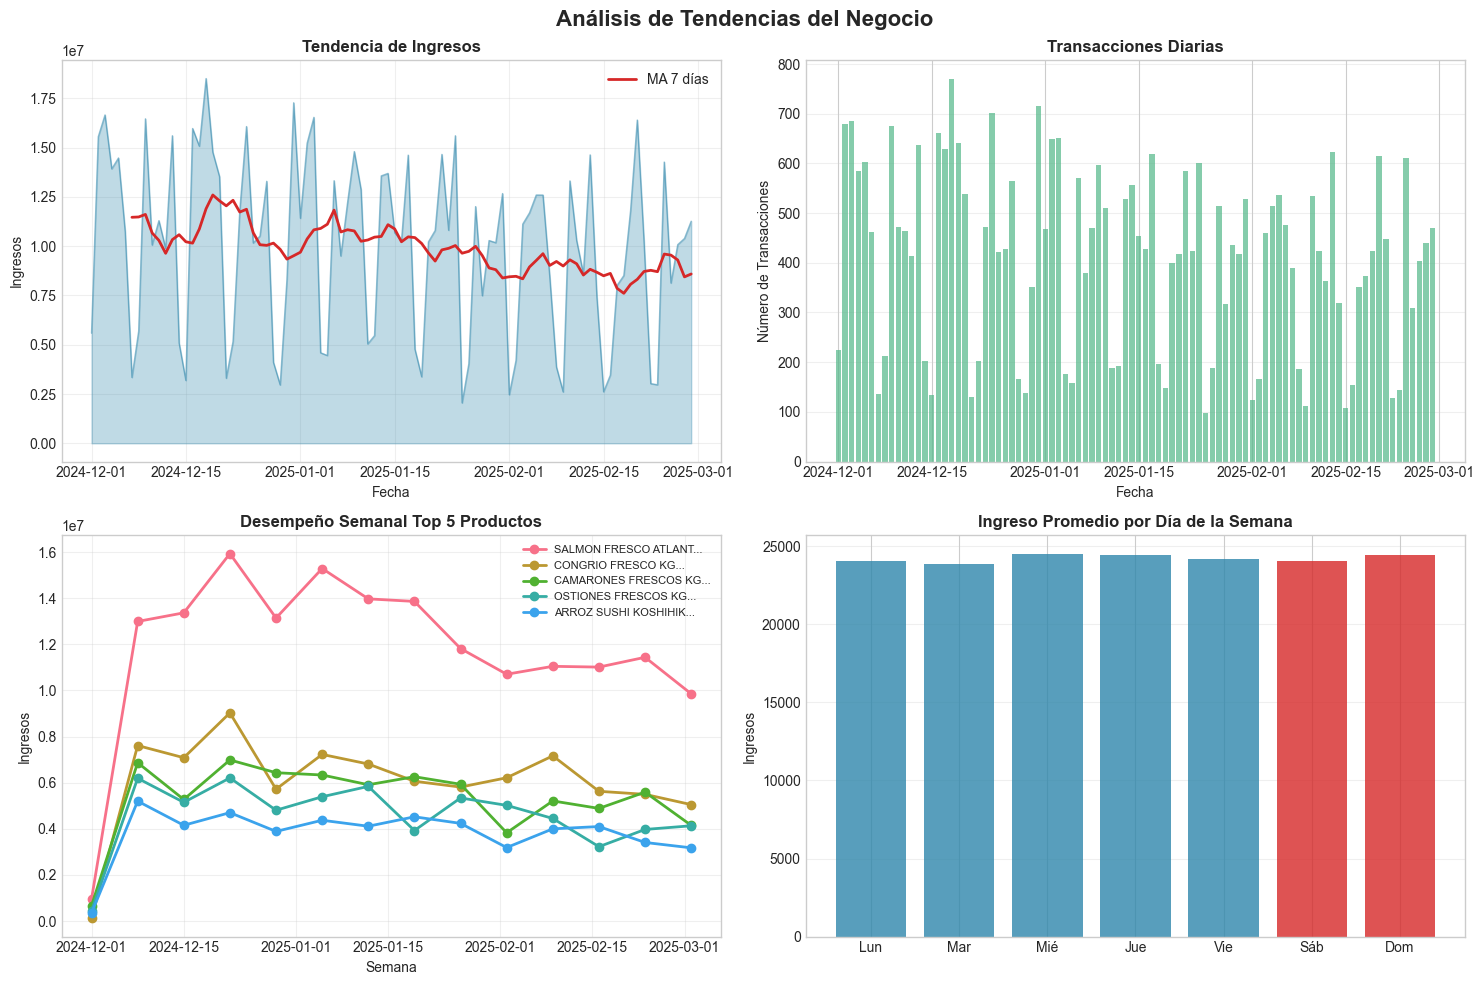

In [11]:
trend_fig = advanced.create_trend_analysis(figsize=(15, 10))
print_fig(trend_fig, dashboard.analyzer.out_dir, fn('DASH', 'trend', 'png'), save=save)

## Product velocity

✅ Dashboard saved to 'outputs\comercializadora\20251002_1237/DASH_velocidad.png'


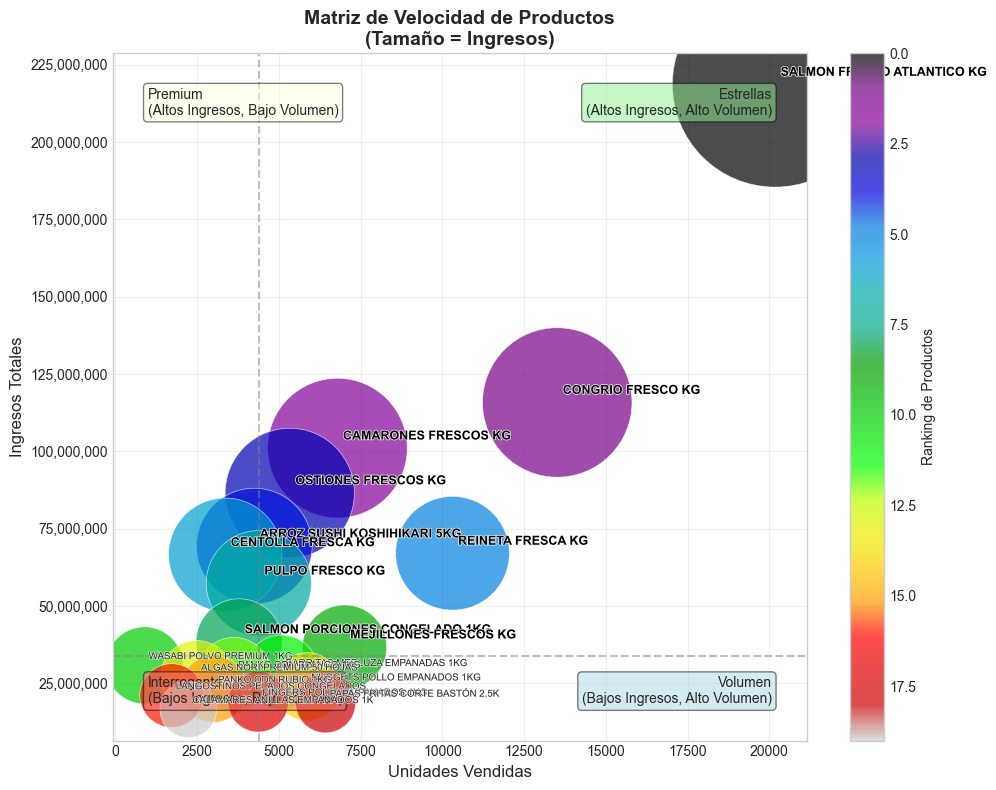

In [12]:
velocity_fig = product_velocity_matrix(analyzer)
print_fig(velocity_fig, dashboard.analyzer.out_dir, fn('DASH', 'velocity', 'png'), save=save)

# Advanced Analytics

## 📈 Forecast

In [13]:
forecast = advanced.calculate_revenue_forecast(days_ahead=30)
print_info(advanced.print_revenue_forecast(), analyzer.out_dir, fn('AV', 'forecast'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/AV_pronostico.txt


## 🛍️ Cross-sell opportunities

In [14]:
cross_sell = advanced.calculate_cross_sell_opportunities(limit=3)
print_info(advanced.print_cross_sell_opportunities(), analyzer.out_dir, fn('AV', 'cross_selling'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/AV_venta_cruzada.txt


## ⚠️ Anomalies

In [15]:
anomalies = advanced.calculate_anomalies(limit=3)
print_info(advanced.print_anomalies(), analyzer.out_dir, fn('AV', 'anomalies'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/AV_anomalias.txt


## 💡 Top Recommmendations

In [16]:
recommendations = advanced.calculate_recommendations()
print_info(advanced.print_recommendations(), analyzer.out_dir, fn('AV', 'recommendations'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/AV_recomendaciones.txt


# Reports

## Weekly Comparison Report

In [17]:
weekly_comparison_report = weekly_comparison_report(analyzer)
print_info(weekly_comparison_report, analyzer.out_dir, fn('REPORT', 'weekly_compare'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/REPORT_comparacion_semanal.txt


## 👥 Customer Segmentation (RFM Analysis)

In [18]:
rfm_segmentation = advanced.calculate_customer_segmentation_rfm()
print_info(advanced.print_customer_segmentation(), analyzer.out_dir, fn('AV', 'customer_segmentation'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/AV_segmentacion_clientes.txt


## 📊 Detailed Customer Segments (Top 5 per Segment)

In [19]:
detailed_segments = advanced.calculate_detailed_customer_segments(top_n=5)
print_info(advanced.print_detailed_customer_segments(top_n=5), analyzer.out_dir, fn('AV', 'detailed_customer_segments'), save=save)

✅ Exported to outputs\comercializadora\20251002_1237/AV_segmentos_detallados_clientes.txt


# Executive Summary

## 📋 Executive Summary (CSV)

In [20]:
# Save executive summary as CSV for easy tracking over time
import pandas as pd

summary_dict = analyzer.get_executive_summary_dict()
summary_df = pd.DataFrame([summary_dict])

if save:
    save_path = os.path.join(analyzer.out_dir, fn('BA', 'executive_summary', 'csv'))
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    summary_df.to_csv(save_path, index=False)
    print(f"✅ Executive summary exported to {save_path}")
else:
    print(summary_df.to_string(index=False))

summary_df

✅ Executive summary exported to outputs\comercializadora\20251002_1237\BA_resumen_ejecutivo.csv


,Date,Total Revenue,Revenue Growth %,Total Transactions,Top 20% Revenue Share,Dead Stock Count,Inventory Health %
0,2025-03-01,1194033014,-16.586181,49372,65.52633,0,9.302326
